In [2]:
sys.path.insert(1, '/Users/lucahartman/Documents/EPFL/MA1/project/ecal_reco/tracking/')
sys.path.insert(1, '/Users/lucahartman/Documents/EPFL/MA1/project/ecal_reco/utils/')
from data_loading import *
from hit import Hit
from track3D import Track3D
from track import Track
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
from matplotlib import pyplot as plt
import sys
from tqdm import tqdm



In [5]:
# later, one can use concatenation of data_0001.root - data_0008.root files as well. One is enough for testing
file_path = '/Users/lucahartman/Documents/EPFL/MA1/project/ecal_reco/geant4/data.root'

branch_list = ['E', 'Edep', 'pdg', 'EcalEdep',
               'layerID', 'barID', 'Nhits', 'theta', 'phi', 'x0', 'y0', 'n_sec', 'ProcessID']
with uproot.open(file_path) as tree:
        hits_dict = tree['events'].arrays(branch_list, library="np")

df_hits = pd.DataFrame.from_dict(hits_dict)

In [9]:
def create_tracks(df, plot=False):
    tracks = []
    nb_events = len(df['E'])
    steps = 9
    buff_start = None
    buff_evt_idx = None
    dts = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        layers = row['layerID']
        bars = row['barID']
        hitsX = [Hit((layers[i], bars[i]), True, 0, 0, 1) for i in range(len(layers)) if i % 2 == 0]
        hitsY = [Hit((layers[i], bars[i]), False, 0, 0, 1) for i in range(len(layers)) if i % 2 == 1]

        ## Some events don't have three hits on one of the two sides and are thus not considered
        if len(hitsX) > 3 and len(hitsY) > 3:
            # get track parameters
            track = Track3D()
            track.x = Track(hitsX)
            track.y = Track(hitsY)
            tracks.append(track)

    return tracks


100%|██████████| 10/10 [00:03<00:00,  2.92it/s]


####### Track # 2
Reduced chi^2 = 0.03
t = -0.05,	 x0 = -1.39
Reduced chi^2 = 0.03
t = -0.05,	 x0 = -1.39


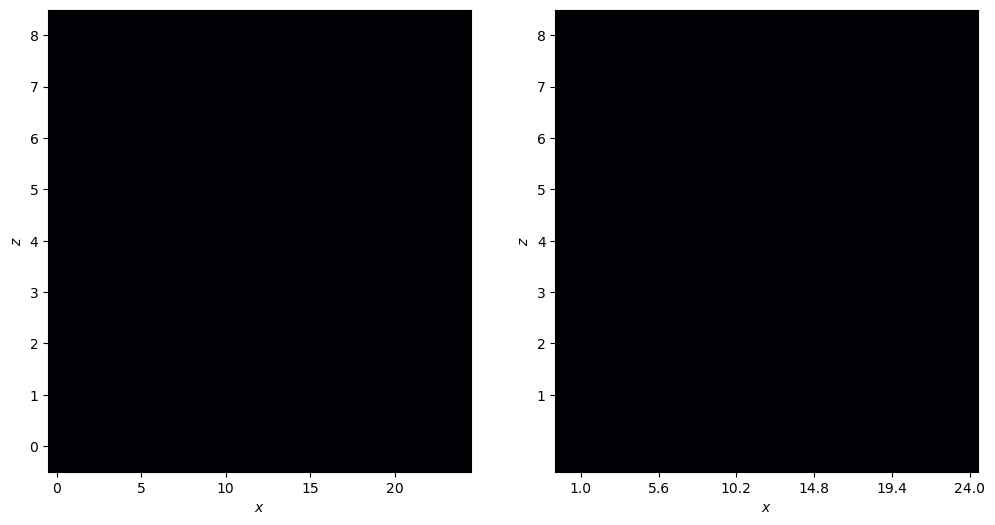

In [16]:
tracks = create_tracks(df_hits.head(10))
# testing individual outputs
i = np.random.randint(0, len(tracks))
print('####### Track # {}'.format(i))
t = tracks[i]
t.print(True)
# t.precise_track()
# print('after')
# t.print(True)
